<a href="https://colab.research.google.com/github/KenDaupsey/Non-parametric-regression/blob/main/Non_parametric_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Non-parametric regression ***

** KERNEL METHOD (ONE DEPENDENT AND ONE INDEPENDENT VARIABLE)**

In [10]:
### KERNELL Regression
### Import Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [11]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Non-parametric-regression/main/hsb2%7Edata.csv"

df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [12]:
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [13]:
df.tail ()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
195,31,female,asian,middle,private,general,55,59,52,42,56
196,145,female,white,middle,public,vocation,42,46,38,36,46
197,187,female,white,middle,private,general,57,41,57,55,52
198,118,female,white,middle,public,general,55,62,58,58,61
199,137,female,white,high,public,academic,63,65,65,53,61


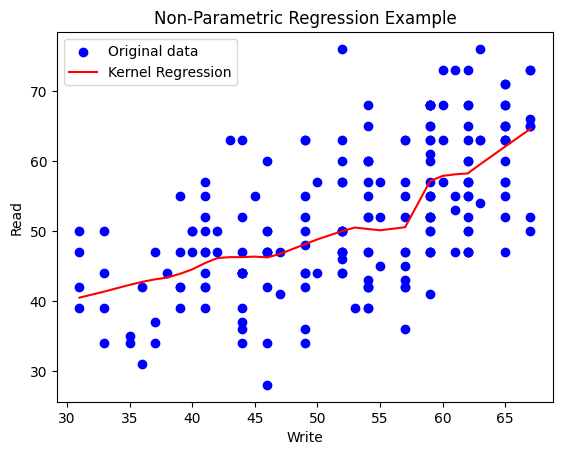

In [14]:
### SELECT VARIABLES, FIT KERNEL REGRESSION AND PLOT RESULTS

# Select variables for non-parametric regression
# For simplicity, let's consider 'read' as the dependent variable and 'write' as the independent variable
X = df['write']
y = df['read']

# Fit kernel regression model
lowess = sm.nonparametric.lowess
y_hat = lowess(y, X, frac=0.3)

# Plot the results
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(y_hat[:, 0], y_hat[:, 1], color='red', label='Kernel Regression')
plt.title('Non-Parametric Regression Example')
plt.xlabel('Write')
plt.ylabel('Read')
plt.legend()


In [15]:
# Permutation test for p-value
np.random.seed(42)  # Set seed for reproducibility
num_permutations = 1000

permuted_p_values = []

for _ in range(num_permutations):
    shuffled_y = shuffle(y, random_state=np.random.randint(1000))
    shuffled_y_hat = lowess(shuffled_y, X, frac=0.3)
    permuted_p_values.append(np.sum((y_hat[:, 1] - shuffled_y_hat[:, 1]) > 0) / len(y))

observed_p_value = np.sum(y_hat[:, 1] > 0) / len(y)

# Calculate the p-value
permuted_p_values = np.array(permuted_p_values)
p_value = np.mean(permuted_p_values >= observed_p_value)

print(f'Observed p-value: {observed_p_value:.4f}')
print(f'Permutation test p-value: {p_value:.4f}')

Observed p-value: 1.0000
Permutation test p-value: 0.0000


*** Polynomial Regression ***

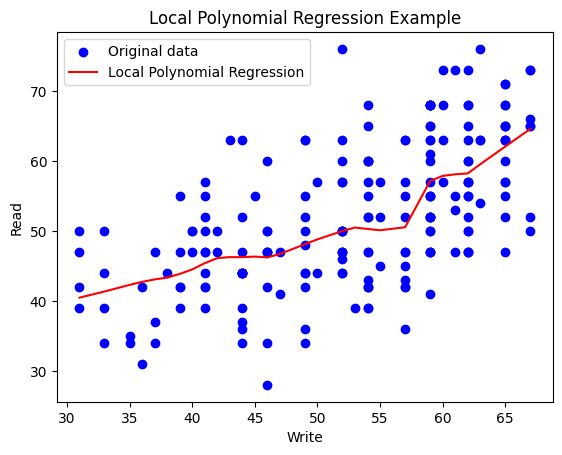

                            OLS Regression Results                            
Dep. Variable:                   read   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.11e-20
Time:                        04:25:52   Log-Likelihood:                -704.77
No. Observations:                 200   AIC:                             1414.
Df Residuals:                     198   BIC:                             1420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1622      3.307      5.492      0.0

In [16]:
### Local Polynomial Regression (LOESS/LOWESS):

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select variables for non-parametric regression
# For simplicity, let's consider 'read' as the dependent variable and 'write' as the independent variable
X = df['write']
y = df['read']

# Fit local polynomial regression model
lowess = sm.nonparametric.lowess
y_hat = lowess(y, X, frac=0.3, it=3)  # Adjust 'it' for the degree of the local polynomial

# Plot the results
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(y_hat[:, 0], y_hat[:, 1], color='red', label='Local Polynomial Regression')
plt.title('Local Polynomial Regression Example')
plt.xlabel('Write')
plt.ylabel('Read')
plt.legend()
plt.show()

# Perform hypothesis testing for the significance of the relationship
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print regression results including p-values
print(results.summary())

*** Kernel-Based Multivariate Regression Analysis ***

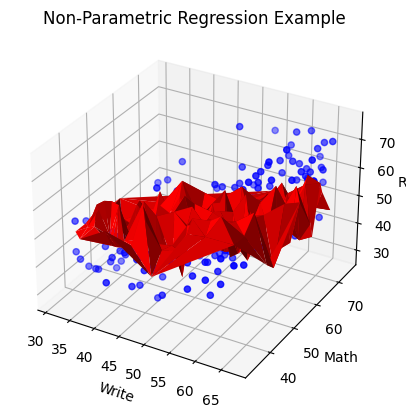

Observed p-value: 1.0000
Permutation test p-value: 0.0000


In [17]:

### ONE DEPENDENT AND TWO INDEPENDENT VARIABLE

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
from sklearn.utils import shuffle

# Select variables for non-parametric regression
# For simplicity, let's consider 'read' as the dependent variable and 'write' and 'math' as the independent variables
X = df[['write', 'math']]
y = df['read']

# Fit kernel regression model
lowess = sm.nonparametric.lowess
y_hat = lowess(y, X['write'], frac=0.3)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['write'], X['math'], y, color='blue', label='Original data')
ax.plot_trisurf(X['write'], X['math'], y_hat[:, 1], color='red', linewidth=0, antialiased=True)
ax.set_title('Non-Parametric Regression Example')
ax.set_xlabel('Write')
ax.set_ylabel('Math')
ax.set_zlabel('Read')
plt.show()

# Permutation test for p-value
np.random.seed(42)  # Set seed for reproducibility
num_permutations = 1000

permuted_p_values = []

for _ in range(num_permutations):
    shuffled_y = shuffle(y, random_state=np.random.randint(1000))
    shuffled_y_hat = lowess(shuffled_y, X['write'], frac=0.3)
    permuted_p_values.append(np.sum((y_hat[:, 1] - shuffled_y_hat[:, 1]) > 0) / len(y))

observed_p_value = np.sum(y_hat[:, 1] > 0) / len(y)

# Calculate the p-value
permuted_p_values = np.array(permuted_p_values)
p_value = np.mean(permuted_p_values >= observed_p_value)

print(f'Observed p-value: {observed_p_value:.4f}')
print(f'Permutation test p-value: {p_value:.4f}')